## 《合成孔径雷达成像——算法与实现》中5.4.1方位混叠造成的方位模糊

In [19]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = ['SimHei'] # 指定默认字体 
plt.rcParams['axes.unicode_minus'] = False # 解决保存图像是负号'-'显示为方块的问题 

In [20]:
from numpy.fft import fft,fftshift,ifft,ifftshift
from numpy import kaiser,sinc,conj,fliplr,log10,abs,max,min
from matplotlib.pyplot import figure,subplot,plot,axis,title,suptitle,xlabel,ylabel,text,arrow,axvline,tight_layout

Ta = 128;                      # 脉冲持续时间
Ka = -0.085;                   # 方位向调频率
# 参数计算
Delta_f_dop = np.abs(Ka*Ta);      # 方位信号带宽
# 参数设置
ratio = [5,0.25];           # 方位过采样率
Fa1 = ratio[0]*Delta_f_dop; # 方位采样频率PRF
N1 = int(2*np.ceil(Fa1*Ta/2));         # 方位采样点数
dt1 = Ta/N1;                   # 采样时间间隔
df1 = Fa1/N1;                  # 采样频率间隔
Fa2 = ratio[1]*Delta_f_dop; # 方位采样频率PRF
N2 = int(2*np.ceil(Fa2*Ta/2)) ;        # 方位采样点数
dt2 = Ta/N2;                   # 采样时间间隔
df2 = Fa2/N2;                  # 采样频率间隔
# 变量设置
t1 = np.arange(-Ta/2,Ta/2,dt1);       # 时间变量
t2 = np.arange(-Ta/2,Ta/2,dt2);       # 时间变量
f1 = np.arange(-Fa1/2,Fa1/2,df1);     # 频率变量
f2 = np.arange(-Fa2/2,Fa2/2,df2);     # 频率变量
# 信号表达
st1 = np.exp(1j*np.pi*Ka*t1**2);     # Chirp信号复数表达式
st2 = np.exp(1j*np.pi*Ka*t2**2);     # Chirp信号复数表达式
omega_a = sinc(6*t2/Ta)**2;    # 双程天线波束方向图
st  = omega_a*st2;            # 天线方向图调制的方位Chirp信号
omega_a_nor = abs(omega_a)/max(abs(omega_a));       # 归一化
omega_a_log = 20*log10(omega_a_nor);                # 对数化
# 窗函数
window_1 = kaiser(N2,2.5);                          # 时域窗
Window_1 = fftshift(window_1);                      # 频域窗
# 信号变换-->方式一
ht_1 = conj(st[::-1]);                              # 将时间反褶后的复制脉冲取复共轭
ht_window_1 = window_1 *ht_1;                       # 加窗
Hf_1 = fftshift(fft(ht_window_1,N2));               # 计算补零离散傅里叶变换
# 窗函数
window_2 = kaiser(N2,2.5) ;                         # 时域窗
Window_2 = fftshift(window_2);                      # 频域窗
# 信号变换-->方式二
ht_2 = st;                                          # 复制信号
ht_window_2 = window_2*ht_2;                        # 加窗
Hf_2 = fftshift(conj(fft(ht_window_2,N2)));         # 计算补零离散傅里叶变换
# 窗函数
window_3 = kaiser(N2,2.5) ;                         # 时域窗
Window_3 = fftshift(window_3);                      # 频域窗
# 信号变换-->方式三
Hf_3 = np.exp(1j*np.pi*f2**2/Ka);                         # 计算补零离散傅里叶变换
# 信号表达
Sf = fftshift(fft(st));
Sf_1 = Sf*Hf_1;
st_1 = ifft(ifftshift(Sf_1));                       # 方式一匹配滤波结果
st_1_nor = abs(st_1)/max(abs(st_1));                # 归一化
st_1_log = 20*log10(st_1_nor);                      # 对数化
Sf_2 = Sf*Hf_2;
st_2 = ifft(ifftshift(Sf_2));                       # 方式二匹配滤波结果
st_2_nor = abs(st_2)/max(abs(st_2));                # 归一化
st_2_log = 20*log10(st_2_nor);                      # 对数化
Sf_3 = Sf*Hf_3;
st_3 = ifft(ifftshift(Sf_3));                       # 方式三匹配滤波结果
st_3_nor = abs(st_3)/max(abs(st_3));               # 归一化
st_3_log = 20*log10(st_3_nor);                      # 对数化


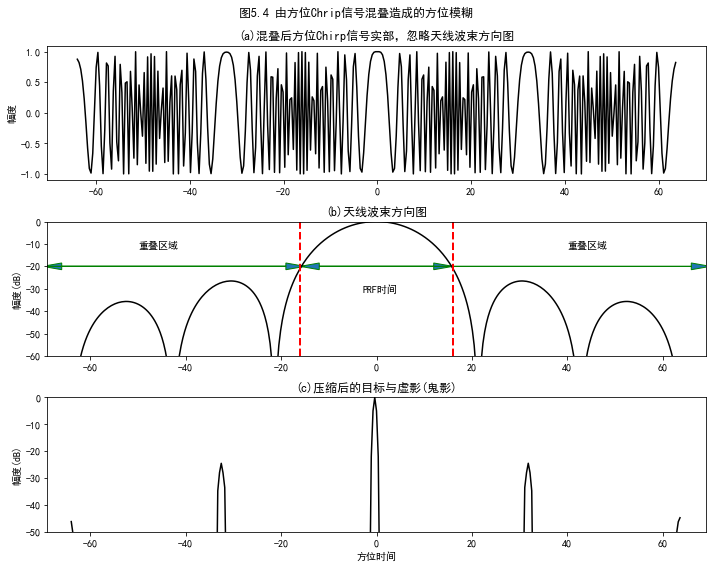

In [21]:
# 绘图
figure(figsize=(10,8));
subplot(311)
plot(t2,np.real(st2),'k')
# axis([-Ta/2-5,Ta/2+5,-1.2,1.2])
title('(a)混叠后方位Chirp信号实部，忽略天线波束方向图');ylabel('幅度')
subplot(312);
plot(t2,omega_a_log,'k')
axis([-Ta/2-5,Ta/2+5,-60,0])
title('(b)天线波束方向图');ylabel('幅度(dB)')
axvline(x=-16, c="r", ls="--", lw=2)
axvline(x= 16, c="r", ls="--", lw=2)
arrow(-16, -20, 28, 0, width = 0.01, head_width=3,head_length=4, ec ='green') 
arrow(16, -20, -28, 0, width = 0.01, head_width=3,head_length=4, ec ='green') 
arrow(69, -20, 50, 0, width = 0.01, head_width=3,head_length=4, ec ='green') 
arrow(-16, -20, -50, 0, width = 0.01, head_width=3,head_length=4, ec ='green') 
arrow(-69, -20, 50, 0, width = 0.01, head_width=3,head_length=4, ec ='green') 
arrow(16, -20, 50, 0, width = 0.01, head_width=3,head_length=4, ec ='green') 
text(-3, -32, "PRF时间")
text(-50, -12, "重叠区域")
text( 40, -12, "重叠区域")
subplot(313)
plot(t2,fftshift(st_1_log),'k')
axis([-Ta/2-5,Ta/2+5,-50,0])
title('(c)压缩后的目标与虚影(鬼影)');xlabel('方位时间');ylabel('幅度(dB)')
suptitle('图5.4 由方位Chrip信号混叠造成的方位模糊')
tight_layout()

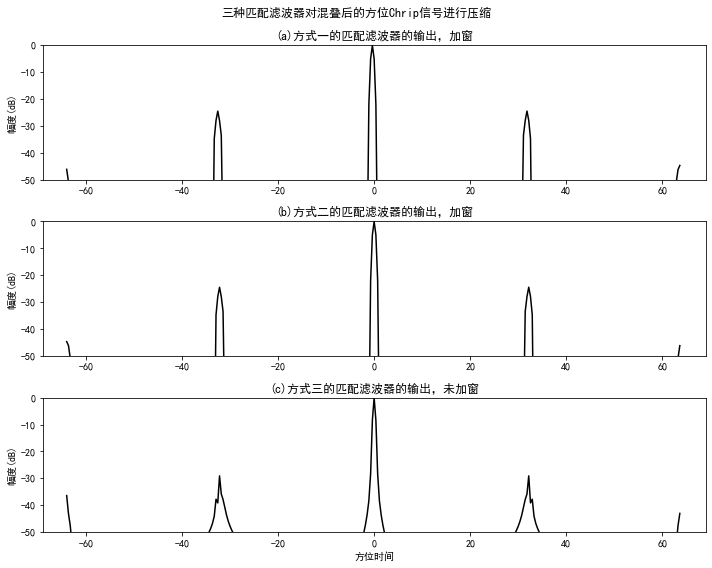

In [22]:
plt.figure(figsize=(10,8));
plt.subplot(311);plot(t2,fftshift(st_1_log),'k')
axis([-Ta/2-5,Ta/2+5,-50,0])
title('(a)方式一的匹配滤波器的输出，加窗');ylabel('幅度(dB)')
subplot(312);plot(t2,fftshift(st_2_log),'k')
axis([-Ta/2-5,Ta/2+5,-50,0])
title('(b)方式二的匹配滤波器的输出，加窗');ylabel('幅度(dB)')
subplot(313);plot(t2,st_3_log,'k')
axis([-Ta/2-5,Ta/2+5,-50,0])
title('(c)方式三的匹配滤波器的输出，未加窗');xlabel('方位时间');ylabel('幅度(dB)')
suptitle('三种匹配滤波器对混叠后的方位Chrip信号进行压缩')
plt.tight_layout()

本文Python代码参照Matlab代码自：https://github.com/wanghs008/SAR-SignalProcessing